### **Code : Final Visualization_1**
- Writer : Donghyeon Kim
- Update : 2022.09.22.
- 대상 : 태양광 사용 가구 및 통합 데이터

<hr>

### **Prior Settings**

In [34]:
# 라이브러리 설정
import os
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# 사용자 함수 호출

# get_project_root : 파일의 상위-상위 경로 호출

# get_name_root : 모든 사용자 이름 호출

# get_name_root_use : 태양광 사용자 이름 호출
# get_name_root_use2 : 태양광 사용자 이름 호출(단독주택 한정)
# get_name_root_use3 : 태양광 사용자 이름 호출(단독주택 + 3kW 한정)

# get_name_root_not : 태양광 미사용자 이름 호출
# get_name_root_not2 : 태양광 미사용자 이름 호출(단독주택 한정)

# kw_dict : kW Dictionary
# kw_value_dict : kW value Dictionary

from pack_utils import get_project_root, get_name_root, get_name_root_use, kw_dict, kw_value_dict
from pack_utils import get_name_root_use2
from pack_utils import get_name_root_use3

<hr>

### **User-Defined Function**
- user : 사용자명
- data_x : x 변수
- data_y : y 변수
- x_label : x 변수 label
- y_label : y 변수 label
- x_lim1, x_lim2 : x 변수 구간
- y_lim1, y_lim2 : y 변수 구간

#### 1. 사용자별 Scatter Plot

In [10]:
def scatter_plot_use(user, data_x, data_y, x_label, y_label, x_lim1, x_lim2, y_lim1, y_lim2):
    print(f'{user} 태양광 사용 가구 : Scatter Plot 시작')
    
    # User Data
    root = get_project_root()
    folder_root = os.path.join(root, 'data_merge_wt_f')
    file_name = folder_root + '\\' + 'all_concat_hour2.xlsx'
    df_file = pd.read_excel(file_name)
    df_user = df_file[df_file.owner == user]
    
    # Name Index
    all_name = get_name_root()
    idx = all_name.index(user) + 1
    
    # 날짜 필터링 : 2021/4 ~ 2022/3
    date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
                 '2022/1', '2022/2', '2022/3']
    
    sns.set(rc={'figure.figsize':(20, 24)})
    plt.suptitle(f'Scatter Plot between {y_label} and {x_label} for household No.{idx} site',
                 y=0.92, fontsize=22, fontweight='bold')
    
    for i in range(len(date_list)):
        df_user_filter = df_user[df_user.ym == date_list[i]]
        
        if i in [1, 2, 4, 5, 7, 8]: # x,y축 label 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.scatterplot(x=data_x, y=data_y, data=df_user_filter, ax=ax)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            axp.set(ylabel=None)
            axp.axes.xaxis.set_ticklabels([])
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [0, 3, 6]: # x축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.scatterplot(x=data_x, y=data_y, data=df_user_filter, ax=ax)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            plt.ylabel(y_label, fontsize=18)
            axp.axes.xaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [10, 11]: # y축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.scatterplot(x=data_x, y=data_y, data=df_user_filter, ax=ax)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            axp.set(ylabel=None)
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        else:
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.scatterplot(x=data_x, y=data_y, data=df_user_filter, ax=ax)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            plt.ylabel(y_label, fontsize=18)
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
    
    result_root = os.path.join(root, 'result_final_use')
    if not os.path.exists(result_root):
        os.makedirs(result_root)
    
    result_user_root = os.path.join(result_root, f'{user}')
    if not os.path.exists(result_user_root):
        os.makedirs(result_user_root)
    
    fig_name = os.path.join(result_user_root, f'{user}_{y_label}_{x_label}.png')
    plt.savefig(fig_name, dpi=300, bbox_inches="tight", pad_inches=0.2)
    print(f'{user} 태양광 사용 가구 : Scatter Plot 종료')
    return

#### 2. 사용자별 Box Plot

In [11]:
def boxplot_use(user, data_x, data_y, x_label, y_label, x_lim1, x_lim2, y_lim1, y_lim2):
    print(f'{user} 태양광 사용 가구 : Box Plot 시작')
    
    # User Data
    root = get_project_root()
    folder_root = os.path.join(root, 'data_merge_wt_f')
    file_name = folder_root + '\\' + 'all_concat_hour2.xlsx'
    df_file = pd.read_excel(file_name)
    df_user = df_file[df_file.owner == user]
    
    # Name Index
    all_name = get_name_root()
    idx = all_name.index(user) + 1
    
    # 날짜 필터링 : 2021/4 ~ 2022/3
    date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
                 '2022/1', '2022/2', '2022/3']
    
    sns.set(rc={'figure.figsize':(20, 24)})
    plt.suptitle(f'Box Plot between {y_label} and {x_label} for household No.{idx} site',
                 y=0.92, fontsize=22, fontweight='bold')
    
    for i in range(len(date_list)):
        df_user_filter = df_user[df_user.ym == date_list[i]]
        
        if i in [1, 2, 4, 5, 7, 8]: # x,y축 label 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.boxplot(x=data_x, y=data_y, data=df_user_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            axp.set(ylabel=None)
            axp.axes.xaxis.set_ticklabels([])
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [0, 3, 6]: # x축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.boxplot(x=data_x, y=data_y, data=df_user_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            plt.ylabel(y_label, fontsize=18)
            axp.axes.xaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [10, 11]: # y축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.boxplot(x=data_x, y=data_y, data=df_user_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            axp.set(ylabel=None)
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        else:
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.boxplot(x=data_x, y=data_y, data=df_user_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            plt.ylabel(y_label, fontsize=18)
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
    
    result_root = os.path.join(root, 'result_final_use')
    if not os.path.exists(result_root):
        os.makedirs(result_root)
    
    result_user_root = os.path.join(result_root, f'{user}')
    if not os.path.exists(result_user_root):
        os.makedirs(result_user_root)
    
    fig_name = os.path.join(result_user_root, f'{user}_{y_label}_{x_label}.png')
    plt.savefig(fig_name, dpi=300, bbox_inches="tight", pad_inches=0.2)
    print(f'{user} 태양광 사용 가구 : Box Plot 종료')
    return

#### 3. 사용자별 Line Plot

In [12]:
def lineplot_use(user, data_x, data_y, x_label, y_label, x_lim1, x_lim2, y_lim1, y_lim2):
    print(f'{user} 태양광 사용 가구 : Line Plot 시작')
    
    # User Data
    root = get_project_root()
    folder_root = os.path.join(root, 'data_merge_wt_f')
    file_name = folder_root + '\\' + 'all_concat_hour2.xlsx'
    df_file = pd.read_excel(file_name)
    df_user = df_file[df_file.owner == user]
    
    # Name Index
    all_name = get_name_root()
    idx = all_name.index(user) + 1
    
    # 날짜 필터링 : 2021/4 ~ 2022/3
    date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
                 '2022/1', '2022/2', '2022/3']
    
    sns.set(rc={'figure.figsize':(20, 24)})
    plt.suptitle(f'Line Plot between {y_label} and {x_label} for household No.{idx} site',
                 y=0.92, fontsize=22, fontweight='bold')
    
    for i in range(len(date_list)):
        df_user_filter = df_user[df_user.ym == date_list[i]]
        
        if i in [1, 2, 4, 5, 7, 8]: # x,y축 label 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, data=df_user_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            axp.set(ylabel=None)
            axp.axes.xaxis.set_ticklabels([])
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [0, 3, 6]: # x축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, data=df_user_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            plt.ylabel(y_label, fontsize=18)
            axp.axes.xaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [10, 11]: # y축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, data=df_user_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            axp.set(ylabel=None)
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        else:
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, data=df_user_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            plt.ylabel(y_label, fontsize=18)
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
    
    result_root = os.path.join(root, 'result_final_use')
    if not os.path.exists(result_root):
        os.makedirs(result_root)
    
    result_user_root = os.path.join(result_root, f'{user}')
    if not os.path.exists(result_user_root):
        os.makedirs(result_user_root)
    
    fig_name = os.path.join(result_user_root, f'{user}_{y_label}_{x_label}_line.png')
    plt.savefig(fig_name, dpi=300, bbox_inches="tight", pad_inches=0.2)
    print(f'{user} 태양광 사용 가구 : Line Plot 종료')
    return

In [13]:
# 태양광 사용 가구 : 단독주택 + 3kW 한정
name_list_use = get_name_root_use3()

<hr>

### **User-Defined Function 2**
- 통합 데이터를 다루기 위한 함수

#### 1. Box Plot : 사용/미사용 가구 구분

In [24]:
def boxplot_use_all(data_x, data_y, x_label, y_label, x_lim1, x_lim2, y_lim1, y_lim2):
    print(f'Box Plot 시작')
    
    # User Data
    root = get_project_root()
    folder_root = os.path.join(root, 'data_merge_wt_f')
    file_name = folder_root + '\\' + 'all_concat_hour2.xlsx'
    df_all = pd.read_excel(file_name)
    
    # 날짜 필터링 : 2021/4 ~ 2022/3
    date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
                 '2022/1', '2022/2', '2022/3']
    
    sns.set(rc={'figure.figsize':(22, 26)})
    plt.suptitle(f'Box Plot between {y_label} and {x_label} for all household',
                 y=0.92, fontsize=22, fontweight='bold')
    
    for i in range(len(date_list)):
        df_all_filter = df_all[df_all.ym == date_list[i]]
        
        if i in [1, 2, 4, 5, 7, 8]: # x,y축 label 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.boxplot(x=data_x, y=data_y, hue='type', data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            axp.set(ylabel=None)
            axp.axes.xaxis.set_ticklabels([])
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [0, 3, 6]: # x축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.boxplot(x=data_x, y=data_y, hue='type', data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            plt.ylabel(y_label, fontsize=18)
            axp.axes.xaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [10, 11]: # y축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.boxplot(x=data_x, y=data_y, hue='type', data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            axp.set(ylabel=None)
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        else:
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.boxplot(x=data_x, y=data_y, hue='type', data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            plt.ylabel(y_label, fontsize=18)
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
    
    result_root = os.path.join(root, 'result_final_all')
    if not os.path.exists(result_root):
        os.makedirs(result_root)
    
    fig_name = os.path.join(result_root, f'All_{y_label}_{x_label}.png')
    plt.savefig(fig_name, dpi=300, bbox_inches="tight", pad_inches=0.2)
    print('Box Plot 종료')
    return

#### 2. Line Plot : 사용/미사용 가구 구분

In [25]:
def lineplot_use_all(data_x, data_y, x_label, y_label, x_lim1, x_lim2, y_lim1, y_lim2):
    print(f'Line Plot 시작')
    
    # User Data
    root = get_project_root()
    folder_root = os.path.join(root, 'data_merge_wt_f')
    file_name = folder_root + '\\' + 'all_concat_hour2.xlsx'
    df_all = pd.read_excel(file_name)
    
    # 날짜 필터링 : 2021/4 ~ 2022/3
    date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
                 '2022/1', '2022/2', '2022/3']
    
    sns.set(rc={'figure.figsize':(22, 26)})
    plt.suptitle(f'Line Plot between {y_label} and {x_label} for all household',
                 y=0.92, fontsize=22, fontweight='bold')
    
    for i in range(len(date_list)):
        df_all_filter = df_all[df_all.ym == date_list[i]]
        
        if i in [1, 2, 4, 5, 7, 8]: # x,y축 label 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, hue='type', data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            axp.set(ylabel=None)
            axp.axes.xaxis.set_ticklabels([])
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [0, 3, 6]: # x축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, hue='type', data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            plt.ylabel(y_label, fontsize=18)
            axp.axes.xaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [10, 11]: # y축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, hue='type', data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            axp.set(ylabel=None)
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        else:
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, hue='type', data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            plt.ylabel(y_label, fontsize=18)
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
    
    result_root = os.path.join(root, 'result_final_all')
    if not os.path.exists(result_root):
        os.makedirs(result_root)
    
    fig_name = os.path.join(result_root, f'All_{y_label}_{x_label}_line.png')
    plt.savefig(fig_name, dpi=300, bbox_inches="tight", pad_inches=0.2)
    print('Line Plot 종료')
    return

#### 3. Line Plot : 사용/미사용 가구 구분 없음

In [26]:
def lineplot_use_all2(data_x, data_y, x_label, y_label, x_lim1, x_lim2, y_lim1, y_lim2):
    print(f'Line Plot 시작')
    
    # User Data
    root = get_project_root()
    folder_root = os.path.join(root, 'data_merge_wt_f')
    file_name = folder_root + '\\' + 'all_concat_hour2.xlsx'
    df_all = pd.read_excel(file_name)
    
    # 날짜 필터링 : 2021/4 ~ 2022/3
    date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
                 '2022/1', '2022/2', '2022/3']
    
    sns.set(rc={'figure.figsize':(22, 26)})
    plt.suptitle(f'Line Plot between {y_label} and {x_label} for all solar households',
                 y=0.92, fontsize=22, fontweight='bold')
    
    for i in range(len(date_list)):
        df_all_filter = df_all[df_all.ym == date_list[i]]
        
        if i in [1, 2, 4, 5, 7, 8]: # x,y축 label 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            axp.set(ylabel=None)
            axp.axes.xaxis.set_ticklabels([])
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [0, 3, 6]: # x축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            plt.ylabel(y_label, fontsize=18)
            axp.axes.xaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [10, 11]: # y축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            axp.set(ylabel=None)
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        else:
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            plt.ylabel(y_label, fontsize=18)
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
    
    result_root = os.path.join(root, 'result_final_use')
    if not os.path.exists(result_root):
        os.makedirs(result_root)
    
    fig_name = os.path.join(result_root, f'Use_{y_label}_{x_label}_line.png')
    plt.savefig(fig_name, dpi=300, bbox_inches="tight", pad_inches=0.2)
    print('Line Plot 종료')
    return

#### 4. Line Plot : 사용 가구 설비용량 구분

In [27]:
def lineplot_use_all3(data_x, data_y, x_label, y_label, x_lim1, x_lim2, y_lim1, y_lim2):
    print(f'Line Plot 시작')
    
    # User Data
    root = get_project_root()
    folder_root = os.path.join(root, 'data_merge_wt_f')
    file_name = folder_root + '\\' + 'all_concat_hour2.xlsx'
    df_all = pd.read_excel(file_name)
    df_all_use = df_all[df_all.type == 'use']
    
    # 날짜 필터링 : 2021/4 ~ 2022/3
    date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
                 '2022/1', '2022/2', '2022/3']
    
    sns.set(rc={'figure.figsize':(22, 26)})
    plt.suptitle(f'Line Plot between {y_label} and {x_label} for all solar households',
                 y=0.92, fontsize=22, fontweight='bold')
    
    for i in range(len(date_list)):
        df_all_filter = df_all_use[df_all_use.ym == date_list[i]]
        
        if i in [1, 2, 4, 5, 7, 8]: # x,y축 label 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, hue='설비용량(kW)', data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            axp.set(ylabel=None)
            axp.axes.xaxis.set_ticklabels([])
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [0, 3, 6]: # x축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, hue='설비용량(kW)', data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            plt.ylabel(y_label, fontsize=18)
            axp.axes.xaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [10, 11]: # y축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, hue='설비용량(kW)', data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            axp.set(ylabel=None)
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        else:
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.lineplot(x=data_x, y=data_y, hue='설비용량(kW)', data=df_all_filter)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            plt.ylabel(y_label, fontsize=18)
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
    
    result_root = os.path.join(root, 'result_final_use')
    if not os.path.exists(result_root):
        os.makedirs(result_root)
    
    fig_name = os.path.join(result_root, f'Use_{y_label}_{x_label}_line.png')
    plt.savefig(fig_name, dpi=300, bbox_inches="tight", pad_inches=0.2)
    print('Line Plot 종료')
    return

#### 5. Scatter Plot : 사용가구 한정

In [59]:
def scatter_plot_use_all(data_x, data_y, x_label, y_label, x_lim1, x_lim2, y_lim1, y_lim2):
    print(f'Scatter Plot 시작')
    
   # User Data
    root = get_project_root()
    folder_root = os.path.join(root, 'data_merge_wt_f')
    file_name = folder_root + '\\' + 'all_concat_hour2.xlsx'
    df_file = pd.read_excel(file_name)
    df_all = df_file[df_file.type == 'use']
    
    # 날짜 필터링 : 2021/4 ~ 2022/3
    date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
                 '2022/1', '2022/2', '2022/3']
    
    sns.set(rc={'figure.figsize':(22, 26)})
    plt.suptitle(f'Scatter Plot between {y_label} and {x_label} for all solar households',
                 y=0.92, fontsize=22, fontweight='bold')
    
    for i in range(len(date_list)):
        df_all_filter = df_all[df_all.ym == date_list[i]]
        
        if i in [1, 2, 4, 5, 7, 8]: # x,y축 label 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.scatterplot(x=data_x, y=data_y, data=df_all_filter, ax=ax)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            axp.set(ylabel=None)
            axp.axes.xaxis.set_ticklabels([])
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [0, 3, 6]: # x축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.scatterplot(x=data_x, y=data_y, data=df_all_filter, ax=ax)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            plt.ylabel(y_label, fontsize=18)
            axp.axes.xaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [10, 11]: # y축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.scatterplot(x=data_x, y=data_y, data=df_all_filter, ax=ax)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            axp.set(ylabel=None)
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        else:
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.scatterplot(x=data_x, y=data_y, data=df_all_filter, ax=ax)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            plt.ylabel(y_label, fontsize=18)
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
    
    result_root = os.path.join(root, 'result_final_use')
    if not os.path.exists(result_root):
        os.makedirs(result_root)
    
    fig_name = os.path.join(result_root, f'Use_{y_label}_{x_label}_Scatter.png')
    plt.savefig(fig_name, dpi=300, bbox_inches="tight", pad_inches=0.2)
    print('Scatter Plot 종료')
    return

#### 6. Scatter Plot : 사용/미사용 가구 구분 없음

In [60]:
def scatter_plot_all(data_x, data_y, x_label, y_label, x_lim1, x_lim2, y_lim1, y_lim2):
    print(f'Scatter Plot 시작')
    
   # User Data
    root = get_project_root()
    folder_root = os.path.join(root, 'data_merge_wt_f')
    file_name = folder_root + '\\' + 'all_concat_hour2.xlsx'
    df_all = pd.read_excel(file_name)
    
    # 날짜 필터링 : 2021/4 ~ 2022/3
    date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
                 '2022/1', '2022/2', '2022/3']
    
    sns.set(rc={'figure.figsize':(22, 26)})
    plt.suptitle(f'Scatter Plot between {y_label} and {x_label} for all households',
                 y=0.92, fontsize=22, fontweight='bold')
    
    for i in range(len(date_list)):
        df_all_filter = df_all[df_all.ym == date_list[i]]
        
        if i in [1, 2, 4, 5, 7, 8]: # x,y축 label 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.scatterplot(x=data_x, y=data_y, data=df_all_filter, ax=ax)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            axp.set(ylabel=None)
            axp.axes.xaxis.set_ticklabels([])
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [0, 3, 6]: # x축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.scatterplot(x=data_x, y=data_y, data=df_all_filter, ax=ax)
            plt.title(f'{date_list[i]}', fontsize=20)
            axp.set(xlabel=None)
            plt.ylabel(y_label, fontsize=18)
            axp.axes.xaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        elif i in [10, 11]: # y축 label만 제거
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.scatterplot(x=data_x, y=data_y, data=df_all_filter, ax=ax)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            axp.set(ylabel=None)
            axp.axes.yaxis.set_ticklabels([])
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
        else:
            ax = plt.subplot(4, 3, i+1)
            plt.subplots_adjust(wspace=0.1, hspace=0.2)
            plt.xlim(x_lim1, x_lim2)
            plt.ylim(y_lim1, y_lim2)
            axp = sns.scatterplot(x=data_x, y=data_y, data=df_all_filter, ax=ax)
            plt.title(f'{date_list[i]}', fontsize=20)
            plt.xlabel(x_label, fontsize=18)
            plt.ylabel(y_label, fontsize=18)
            handles, labels = axp.get_legend_handles_labels()
            list_labels_handles = [(h, v) for h, v in zip(handles, labels)]
            list_labels_handles = sorted(list_labels_handles, key=lambda x: x[1])
            labels = [x[1] for x in list_labels_handles]
            handles = [x[0] for x in list_labels_handles]
            ax.legend(handles, labels)
    
    result_root = os.path.join(root, 'result_final_all')
    if not os.path.exists(result_root):
        os.makedirs(result_root)
    
    fig_name = os.path.join(result_root, f'All_{y_label}_{x_label}_Scatter.png')
    plt.savefig(fig_name, dpi=300, bbox_inches="tight", pad_inches=0.2)
    print('Scatter Plot 종료')
    return

<hr>

#### **태양광 발전량**

In [37]:
# All Data
root = get_project_root()
folder_root = os.path.join(root, 'data_merge_wt_f')
file_name = os.path.join(folder_root, 'all_concat_day2.xlsx')
df_all_day = pd.read_excel(file_name)

# Filtering
df_all_day_use = df_all_day[df_all_day.type == 'use']

In [38]:
date_list = ['2021/4', '2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3']
df_all_day_use2 = df_all_day_use[df_all_day_use.ym != '2021/3']
df_all_day_use_f = df_all_day_use2[df_all_day_use2.ym != '2022/4']

Text(0, 0.5, 'Generation Time')

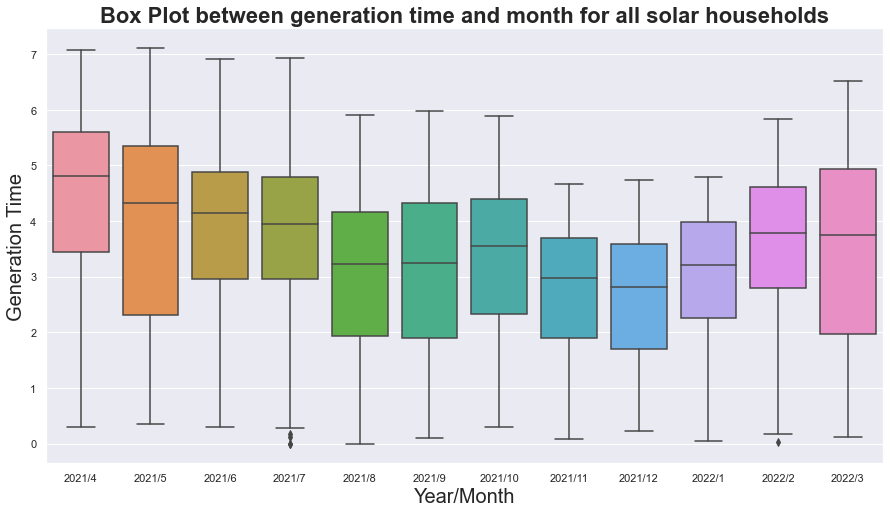

In [39]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.boxplot(x='ym', y='발전시간', data=df_all_day_use_f)
plt.title(f'Box Plot between generation time and month for all solar households', fontsize=22, fontweight='bold')
plt.xlabel('Year/Month', fontsize=20)
plt.ylabel('Generation Time', fontsize=20)

# result_root = os.path.join(root, 'result_final_use')
# if not os.path.exists(result_root):
#     os.makedirs(result_root)
    
# fig_name = os.path.join(result_root, 'Use_Generation Time_YM.png')
# plt.savefig(fig_name, dpi=300, bbox_inches="tight", pad_inches=0.2)

Text(0, 0.5, 'Using Rate')

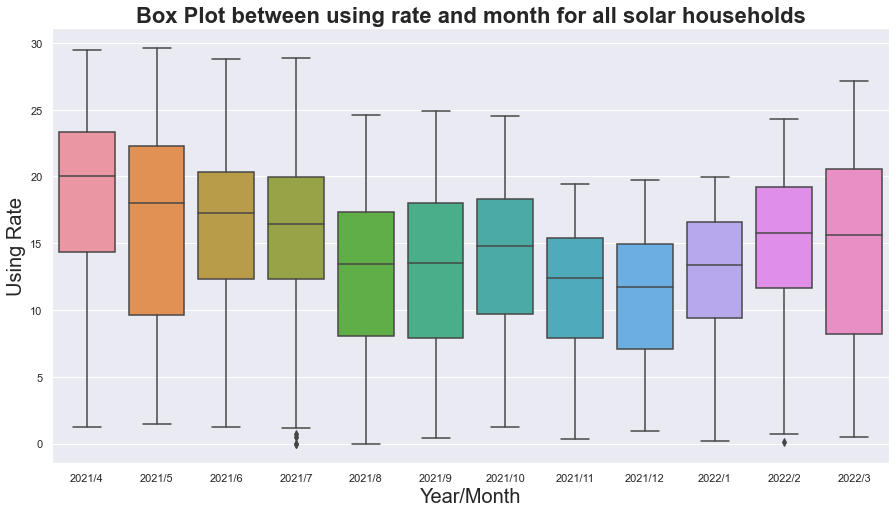

In [40]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.boxplot(x='ym', y='이용률', data=df_all_day_use_f)
plt.title(f'Box Plot between using rate and month for all solar households', fontsize=22, fontweight='bold')
plt.xlabel('Year/Month', fontsize=20)
plt.ylabel('Using Rate', fontsize=20)

# result_root = os.path.join(root, 'result_final_use')
# if not os.path.exists(result_root):
#     os.makedirs(result_root)
    
# fig_name = os.path.join(result_root, 'Use_Using Rate_YM.png')
# plt.savefig(fig_name, dpi=300, bbox_inches="tight", pad_inches=0.2)

In [41]:
df_all_day_use.groupby(['ym']).describe()['발전시간']

,count,mean,std,min,25%,50%,75%,max
ym,,,,,,,,
2021/10,310.0,3.281029,1.390318,0.296170,2.322584,3.555054,4.385925,5.879964
2021/11,300.0,2.747654,1.196984,0.090007,1.887573,2.966756,3.701681,4.663330
2021/12,310.0,2.643077,1.137310,0.230062,1.706645,2.820204,3.584941,4.733480
2021/3,214.0,3.852084,1.718648,0.179999,3.069167,4.353325,5.174998,6.370036
2021/4,294.0,4.367257,1.654225,0.293335,3.440002,4.801663,5.605830,7.076640
2021/5,310.0,3.890825,1.850288,0.349996,2.309184,4.318338,5.349187,7.103353
2021/6,300.0,3.909740,1.472267,0.303345,2.964945,4.136703,4.878377,6.903239
2021/7,309.0,3.760035,1.437880,0.000000,2.956760,3.946615,4.786580,6.929932
2021/8,310.0,3.054670,1.447283,0.000000,1.931610,3.223348,4.165815,5.903320


In [42]:
df_all_day_use.groupby(['ym']).describe()['이용률']

,count,mean,std,min,25%,50%,75%,max
ym,,,,,,,,
2021/10,310.0,13.670954,5.792991,1.234040,9.677435,14.812724,18.274689,24.499851
2021/11,300.0,11.448558,4.987432,0.375027,7.864889,12.361484,15.423669,19.430542
2021/12,310.0,11.012821,4.738793,0.958591,7.111020,11.750850,14.937252,19.722833
2021/3,214.0,16.050352,7.161032,0.749996,12.788195,18.138854,21.562492,26.541816
2021/4,294.0,18.196902,6.892604,1.222229,14.333344,20.006930,23.357624,29.485999
2021/5,310.0,16.211771,7.709532,1.458316,9.621599,17.993074,22.288280,29.597304
2021/6,300.0,16.290583,6.134445,1.263936,12.353939,17.236265,20.326572,28.763496
2021/7,309.0,15.666811,5.991165,0.000000,12.319833,16.444227,19.944085,28.874715
2021/8,310.0,12.727793,6.030347,0.000000,8.048375,13.430617,17.357561,24.597168


<hr>

#### **잉여전력량**

Line Plot 시작
Line Plot 종료


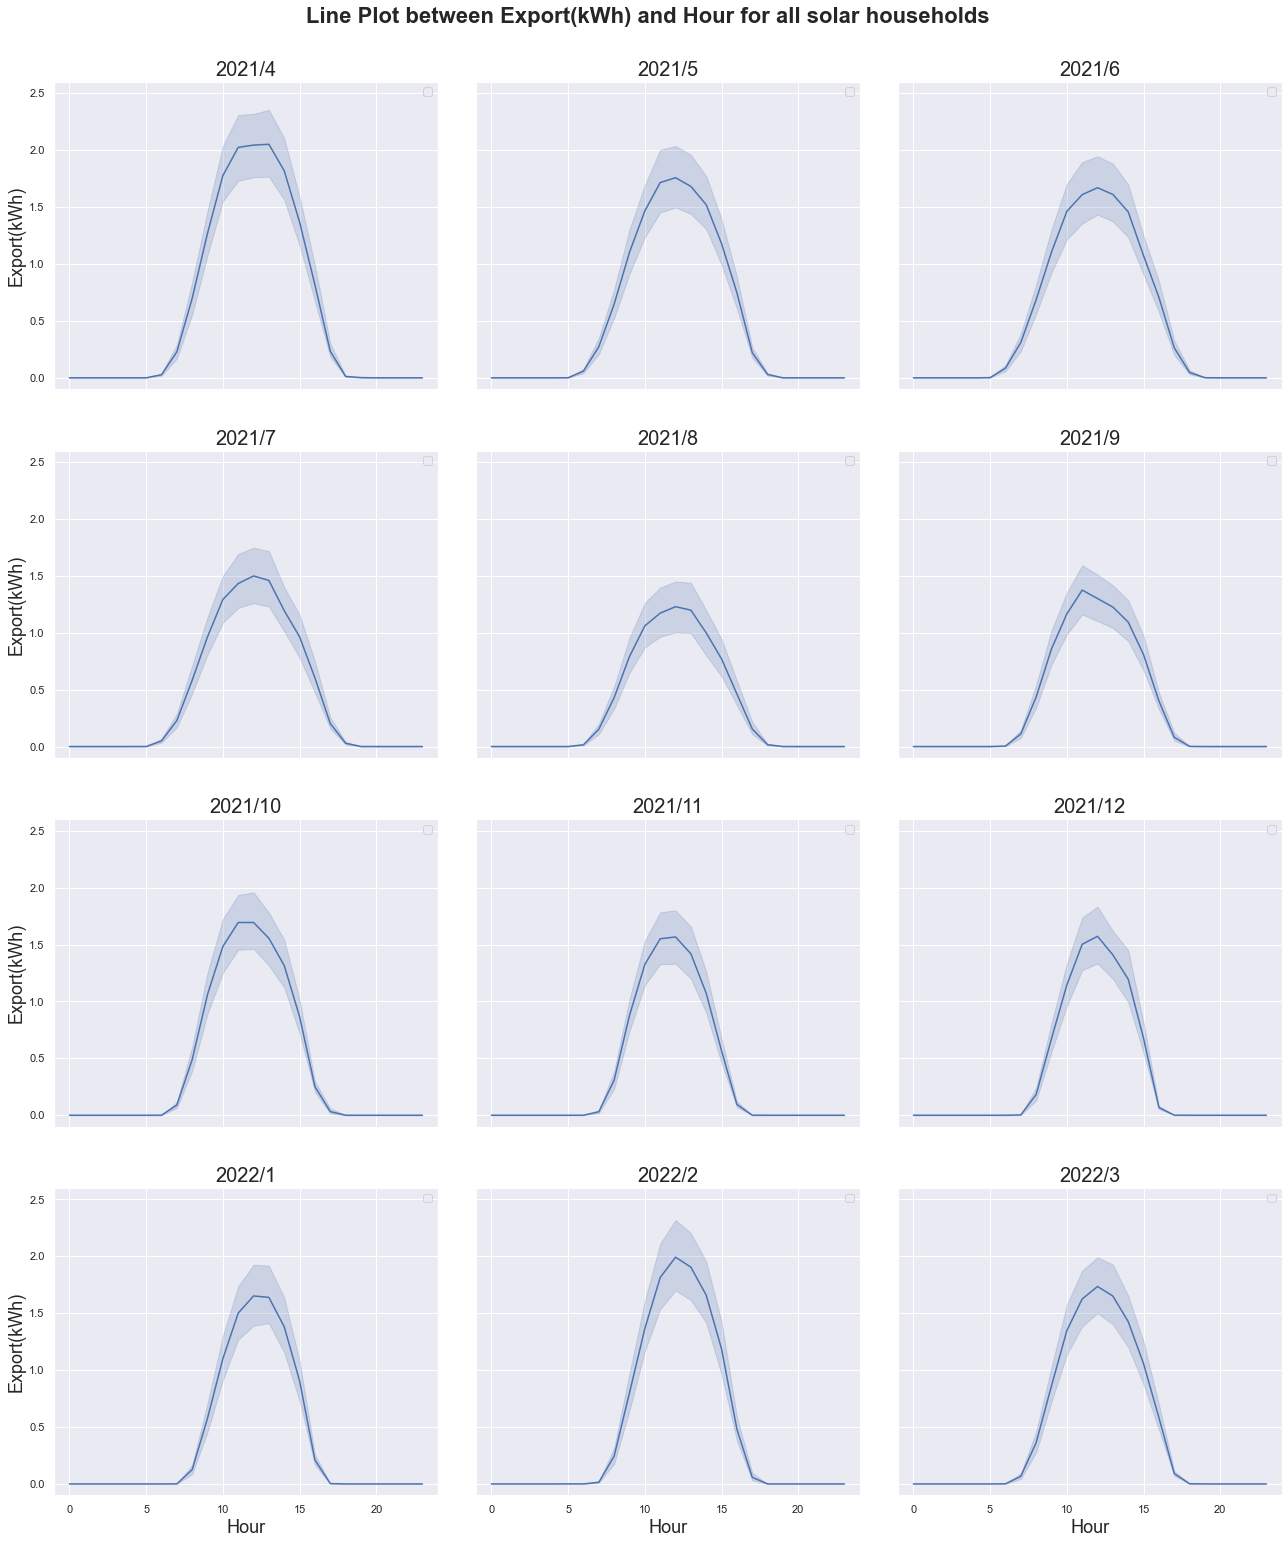

In [43]:
lineplot_use_all2('시간', '잉여전력량(kWh)', 'Hour', 'Export(kWh)', -1.0, 24.0, -0.1, 2.6)

In [44]:
# # All Data
# root = get_project_root()
# folder_root = os.path.join(root, 'data_merge_wt_f')
# file_name = os.path.join(folder_root, 'all_concat_hour2.xlsx')
# df_all_hour = pd.read_excel(file_name)

# # Filtering
# df_all_hour_use = df_all_hour[df_all_hour.type == 'use']

In [45]:
# pd.set_option('display.max_rows', 500)
# df_all_hour_use.groupby(['ym', '시간']).describe()['잉여전력량(kWh)']

# 참고 #
# 잉여전력량(kWh)은 새벽과 저녁에는 0kWh임. 이에 따라, subtract() 오류가 발생하나, 이는 무시하여도 상관없음.

<hr>

#### **수전 전력량**

Line Plot 시작
Line Plot 종료


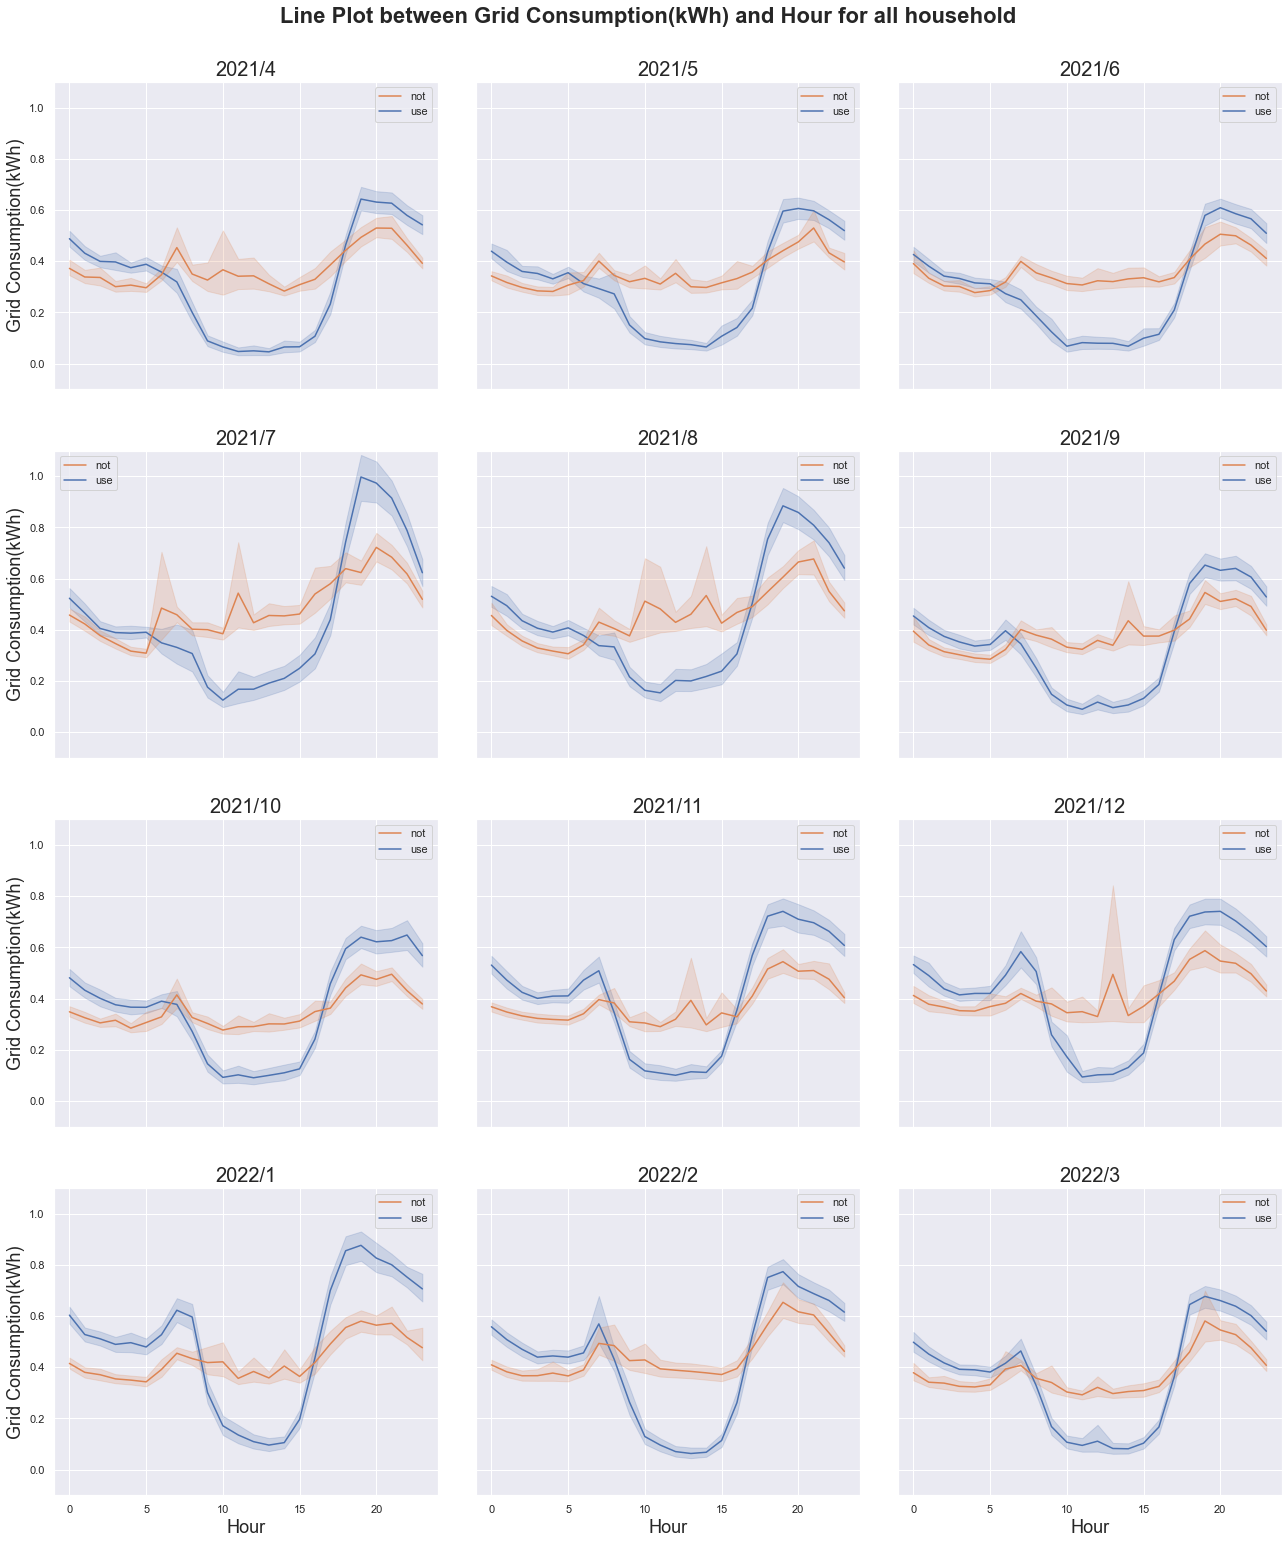

In [46]:
lineplot_use_all('시간', '수전전력량(kWh)', 'Hour', 'Grid Consumption(kWh)', -1.0, 24.0, -0.1, 1.1)

<hr>

#### **자가소비율(SCR)**

Line Plot 시작
Line Plot 종료


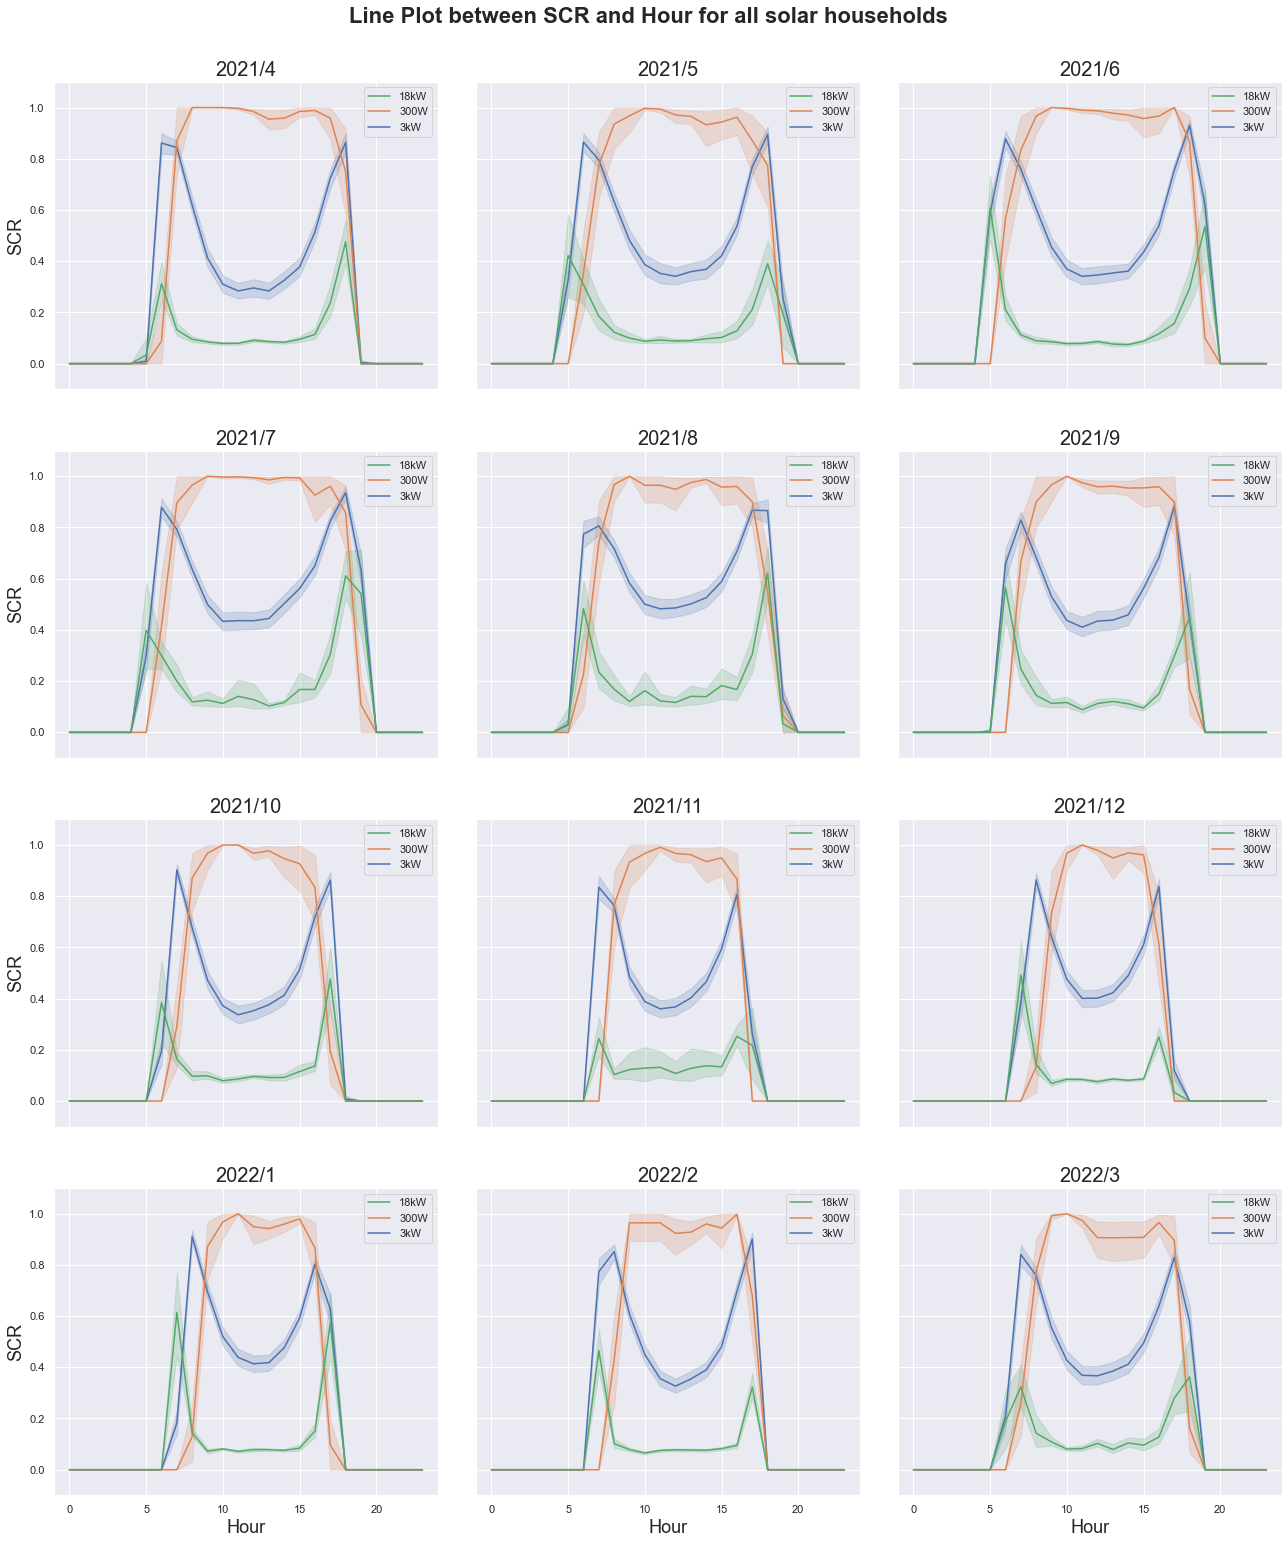

In [47]:
lineplot_use_all3('시간', '자가소비율', 'Hour', 'SCR', -1.0, 24.0, -0.1, 1.1)

In [48]:
df_all_hour_use.groupby(['ym', '설비용량(kW)']).describe()['자가소비율']

count      mean       std  min  25%       50%       75%  \
ym      설비용량(kW)                                                             
2021/10 18kW       744.0  0.079822  0.170330  0.0  0.0  0.000000  0.093716   
        300W       743.0  0.374483  0.481135  0.0  0.0  0.000000  1.000000   
        3kW       5803.0  0.258447  0.360880  0.0  0.0  0.000000  0.444500   
2021/11 18kW       720.0  0.071116  0.153766  0.0  0.0  0.000000  0.089433   
        300W       720.0  0.347396  0.471906  0.0  0.0  0.000000  1.000000   
        3kW       5646.0  0.238756  0.355458  0.0  0.0  0.000000  0.401557   
2021/12 18kW       742.0  0.061852  0.143492  0.0  0.0  0.000000  0.079922   
        300W       742.0  0.304054  0.457370  0.0  0.0  0.000000  1.000000   
        3kW       5818.0  0.235593  0.355305  0.0  0.0  0.000000  0.412894   
2021/3  18kW       744.0  0.085288  0.175006  0.0  0.0  0.046205  0.084188   
        3kW       4225.0  0.262571  0.363672  0.0  0.0  0.000000  0.436800   
2021/4  18kW       720.0  0.083127  0.142021  0.0  0.0  0.061513  0.095347   
        300W       566.0  0.483798  0.495672  0.0  0.0  0.000000  1.000000   
        3kW       5641.0  0.278758  0.365467  0.0  0.0  0.088233  0.500000   
2021/5  18kW       744.0  0.108938  0.197191  0.0  0.0  0.067728  0.106574   
        300W       744.0  0.476811  0.495215  0.0  0.0  0.000000  1.000000   
        3kW       5805.0  0.324438  0.388740  0.0  0.0  0.124222  0.666817   
2021/6  18kW       706.0  0.112308  0.203609  0.0  0.0  0.066056  0.102171   
        300W       717.0  0.505470  0.497250  0.0  0.0  0.888889  1.000000   
        3kW       5583.0  0.345329  0.386894  0.0  0.0  0.180457  0.697792   
2021/7  18kW       732.0  0.147434  0.242231  0.0  0.0  0.089557  0.139360   
        300W       690.0  0.504039  0.498753  0.0  0.0  0.906927  1.000000   
        3kW       5739.0  0.373055  0.402838  0.0  0.0  0.223739  0.799994   
2021/8  18kW       731.0  0.126949  0.207760  0.0  0.0  0.083806  0.133454   
        300W       744.0  0.466980  0.496236  0.0  0.0  0.000000  1.000000   
        3kW       5804.0  0.354153  0.406777  0.0  0.0  0.148406  0.783624   
2021/9  18kW       719.0  0.108756  0.198693  0.0  0.0  0.065356  0.117166   
        300W       719.0  0.431013  0.489410  0.0  0.0  0.000000  1.000000   
        3kW       5625.0  0.310887  0.387948  0.0  0.0  0.000000  0.642982   
2022/1  18kW       743.0  0.084389  0.201533  0.0  0.0  0.000000  0.080350   
        300W       744.0  0.323330  0.462890  0.0  0.0  0.000000  1.000000   
        3kW       5803.0  0.251203  0.363135  0.0  0.0  0.000000  0.484619   
2022/2  18kW       672.0  0.063160  0.120702  0.0  0.0  0.000000  0.079466   
        300W       672.0  0.364654  0.475916  0.0  0.0  0.000000  1.000000   
        3kW       5269.0  0.257219  0.357690  0.0  0.0  0.000000  0.462637   
2022/3  18kW       743.0  0.086629  0.168699  0.0  0.0  0.000000  0.092860   
        300W       744.0  0.401927  0.481403  0.0  0.0  0.000000  1.000000   
        3kW       5837.0  0.285171  0.379474  0.0  0.0  0.000000  0.551997   
2022/4  18kW       718.0  0.086601  0.149547  0.0  0.0  0.062986  0.093871   
        300W       548.0  0.484692  0.496562  0.0  0.0  0.000000  1.000000   
        3kW       5677.0  0.278904  0.362971  0.0  0.0  0.096574  0.483610   

                  max  
ym      설비용량(kW)       
2021/10 18kW      1.0  
        300W      1.0  
        3kW       1.0  
2021/11 18kW      1.0  
        300W      1.0  
        3kW       1.0  
2021/12 18kW      1.0  
        300W      1.0  
        3kW       1.0  
2021/3  18kW      1.0  
        3kW       1.0  
2021/4  18kW      1.0  
        300W      1.0  
        3kW       1.0  
2021/5  18kW      1.0  
        300W      1.0  
        3kW       1.0  
2021/6  18kW      1.0  
        300W      1.0  
        3kW       1.0  
2021/7  18kW      1.0  
        300W      1.0  
        3kW       1.0  
2021/8  18kW      1.0  
        300W      1.0  
        3kW     

<hr>

#### **자가공급률(SSR)**

Line Plot 시작
Line Plot 종료


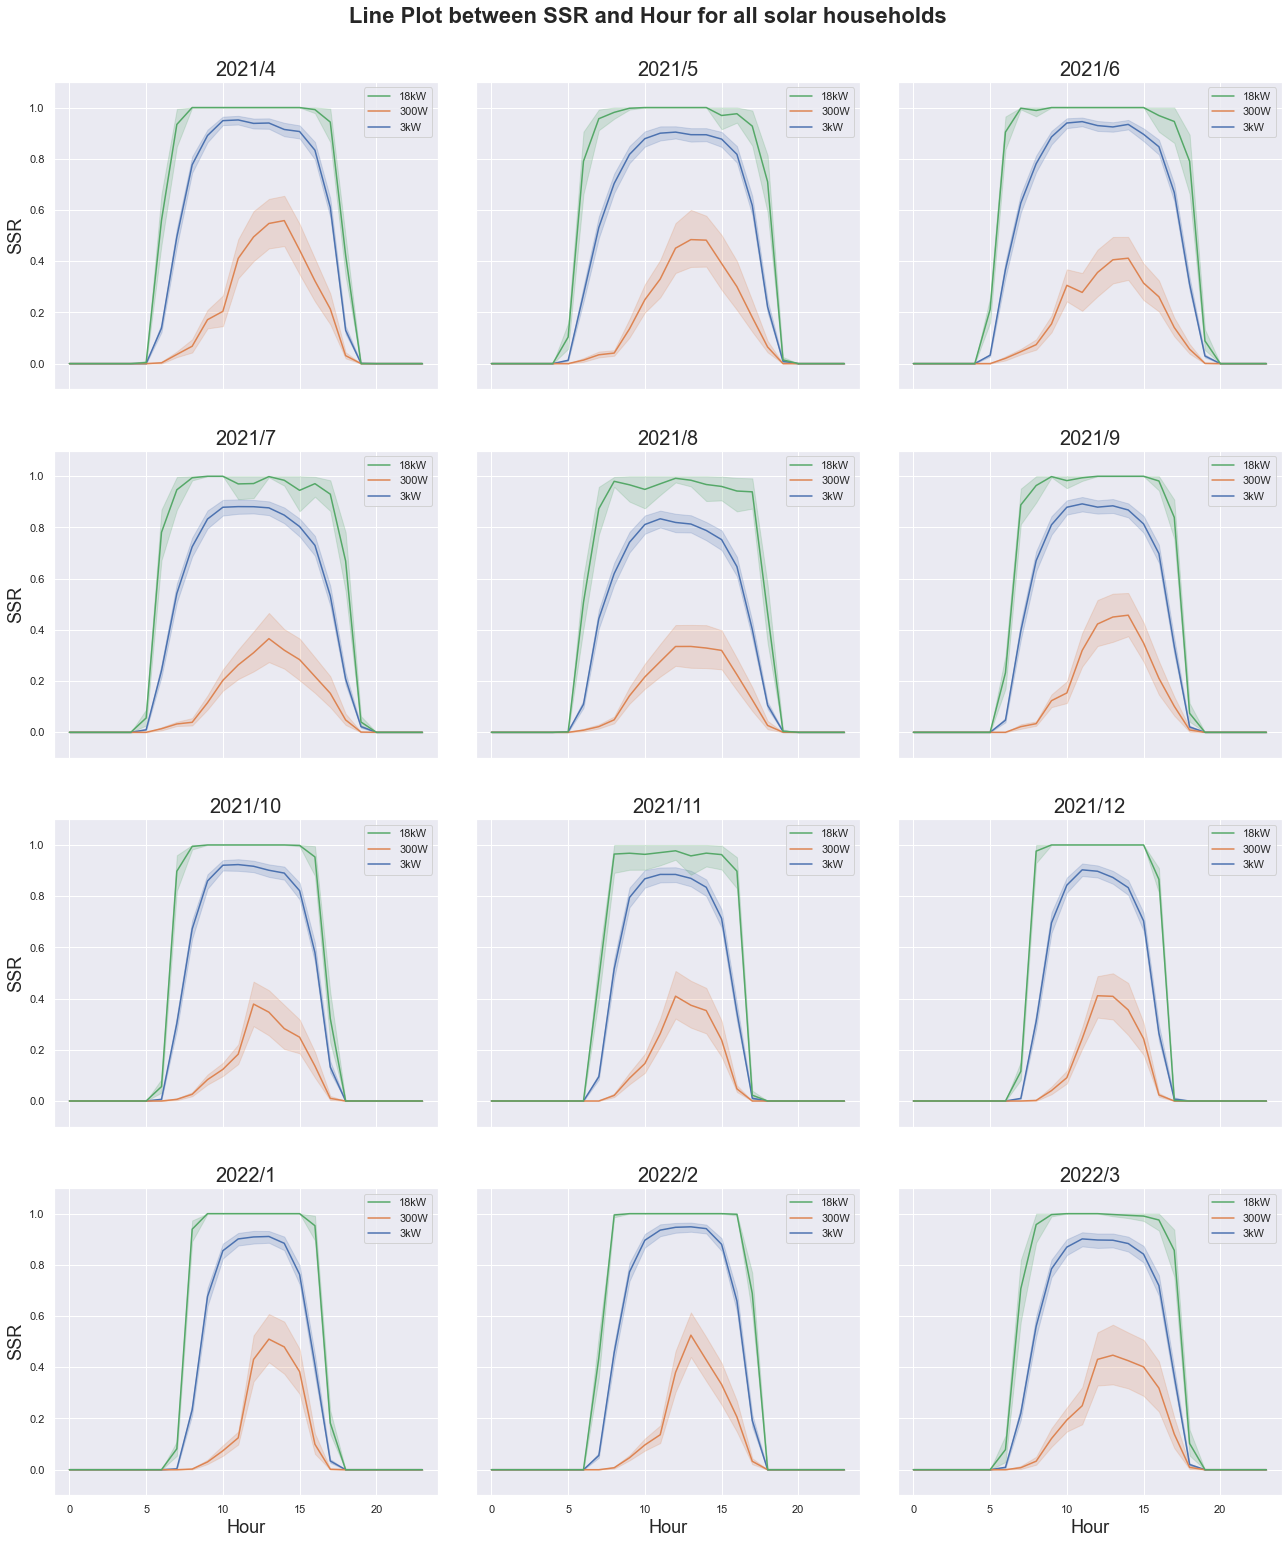

In [49]:
lineplot_use_all3('시간', '자가공급률', 'Hour', 'SSR', -1.0, 24.0, -0.1, 1.1)

In [50]:
df_all_hour_use.groupby(['ym', '설비용량(kW)']).describe()['자가공급률']

count      mean       std  min  25%       50%       75%  \
ym      설비용량(kW)                                                             
2021/10 18kW       744.0  0.425886  0.483503  0.0  0.0  0.000000  1.000000   
        300W       743.0  0.076203  0.159221  0.0  0.0  0.000000  0.074713   
        3kW       5803.0  0.330384  0.426908  0.0  0.0  0.000000  0.874911   
2021/11 18kW       720.0  0.380363  0.469546  0.0  0.0  0.000000  1.000000   
        300W       720.0  0.080932  0.172364  0.0  0.0  0.000000  0.062457   
        3kW       5646.0  0.284482  0.409593  0.0  0.0  0.000000  0.697405   
2021/12 18kW       742.0  0.372948  0.475133  0.0  0.0  0.000000  1.000000   
        300W       742.0  0.075961  0.172483  0.0  0.0  0.000000  0.041694   
        3kW       5819.0  0.264383  0.397530  0.0  0.0  0.000000  0.580260   
2021/3  18kW       744.0  0.451976  0.486077  0.0  0.0  0.062199  1.000000   
        3kW       4225.0  0.363669  0.441837  0.0  0.0  0.000000  0.956521   
2021/4  18kW       720.0  0.493986  0.482158  0.0  0.0  0.449728  1.000000   
        300W       566.0  0.148095  0.236217  0.0  0.0  0.000000  0.232117   
        3kW       5641.0  0.393044  0.444774  0.0  0.0  0.071426  0.969203   
2021/5  18kW       744.0  0.517711  0.485716  0.0  0.0  0.773526  1.000000   
        300W       744.0  0.131601  0.230701  0.0  0.0  0.000000  0.149990   
        3kW       5805.0  0.388880  0.434449  0.0  0.0  0.109824  0.938284   
2021/6  18kW       706.0  0.541161  0.483248  0.0  0.0  1.000000  1.000000   
        300W       717.0  0.116909  0.191106  0.0  0.0  0.012661  0.153842   
        3kW       5583.0  0.420103  0.440386  0.0  0.0  0.200051  0.958294   
2021/7  18kW       732.0  0.515535  0.483868  0.0  0.0  0.787461  1.000000   
        300W       690.0  0.098876  0.173060  0.0  0.0  0.005887  0.128682   
        3kW       5739.0  0.375315  0.425158  0.0  0.0  0.097648  0.891519   
2021/8  18kW       731.0  0.484597  0.479431  0.0  0.0  0.400244  1.000000   
        300W       744.0  0.100518  0.174798  0.0  0.0  0.000000  0.129366   
        3kW       5804.0  0.325587  0.404803  0.0  0.0  0.022493  0.759392   
2021/9  18kW       719.0  0.455730  0.481671  0.0  0.0  0.088963  1.000000   
        300W       719.0  0.110114  0.198511  0.0  0.0  0.000000  0.123862   
        3kW       5625.0  0.342082  0.423683  0.0  0.0  0.000000  0.854812   
2022/1  18kW       743.0  0.382023  0.474526  0.0  0.0  0.000000  1.000000   
        300W       744.0  0.088947  0.202591  0.0  0.0  0.000000  0.041271   
        3kW       5803.0  0.271100  0.403881  0.0  0.0  0.000000  0.640342   
2022/2  18kW       672.0  0.421579  0.477923  0.0  0.0  0.000000  1.000000   
        300W       672.0  0.091366  0.187411  0.0  0.0  0.000000  0.079249   
        3kW       5269.0  0.319020  0.426392  0.0  0.0  0.000000  0.850646   
2022/3  18kW       743.0  0.444491  0.483047  0.0  0.0  0.000000  1.000000   
        300W       744.0  0.115774  0.225088  0.0  0.0  0.000000  0.120127   
        3kW       5837.0  0.331065  0.426977  0.0  0.0  0.000000  0.866522   
2022/4  18kW       718.0  0.496046  0.482077  0.0  0.0  0.505171  1.000000   
        300W       548.0  0.137465  0.226615  0.0  0.0  0.000000  0.176717   
        3kW       5677.0  0.399153  0.449552  0.0  0.0  0.078738  0.983593   

                       max  
ym      설비용량(kW)            
2021/10 18kW      1.000000  
        300W      1.000000  
        3kW       1.000000  
2021/11 18kW      1.000000  
        300W      0.899911  
        3kW       1.000000  
2021/12 18kW      1.000000  
        300W      1.000000  
        3kW       1.000000  
2021/3  18kW      1.000000  
        3kW       1.000000  
2021/4  18kW      1.000000  
        300W      1.000000  
        3kW       1.000000  
2021/5  18kW      1.000000  
        300W      1.000000  
        3kW       1.000000  
2021/6  18kW      1.000000  
        300W      0.944715  
        3kW       1.000000  
2021/7  18kW      1.000000

<hr>

#### **일사량 vs 태양광 발전량**

Scatter Plot 시작
Scatter Plot 종료


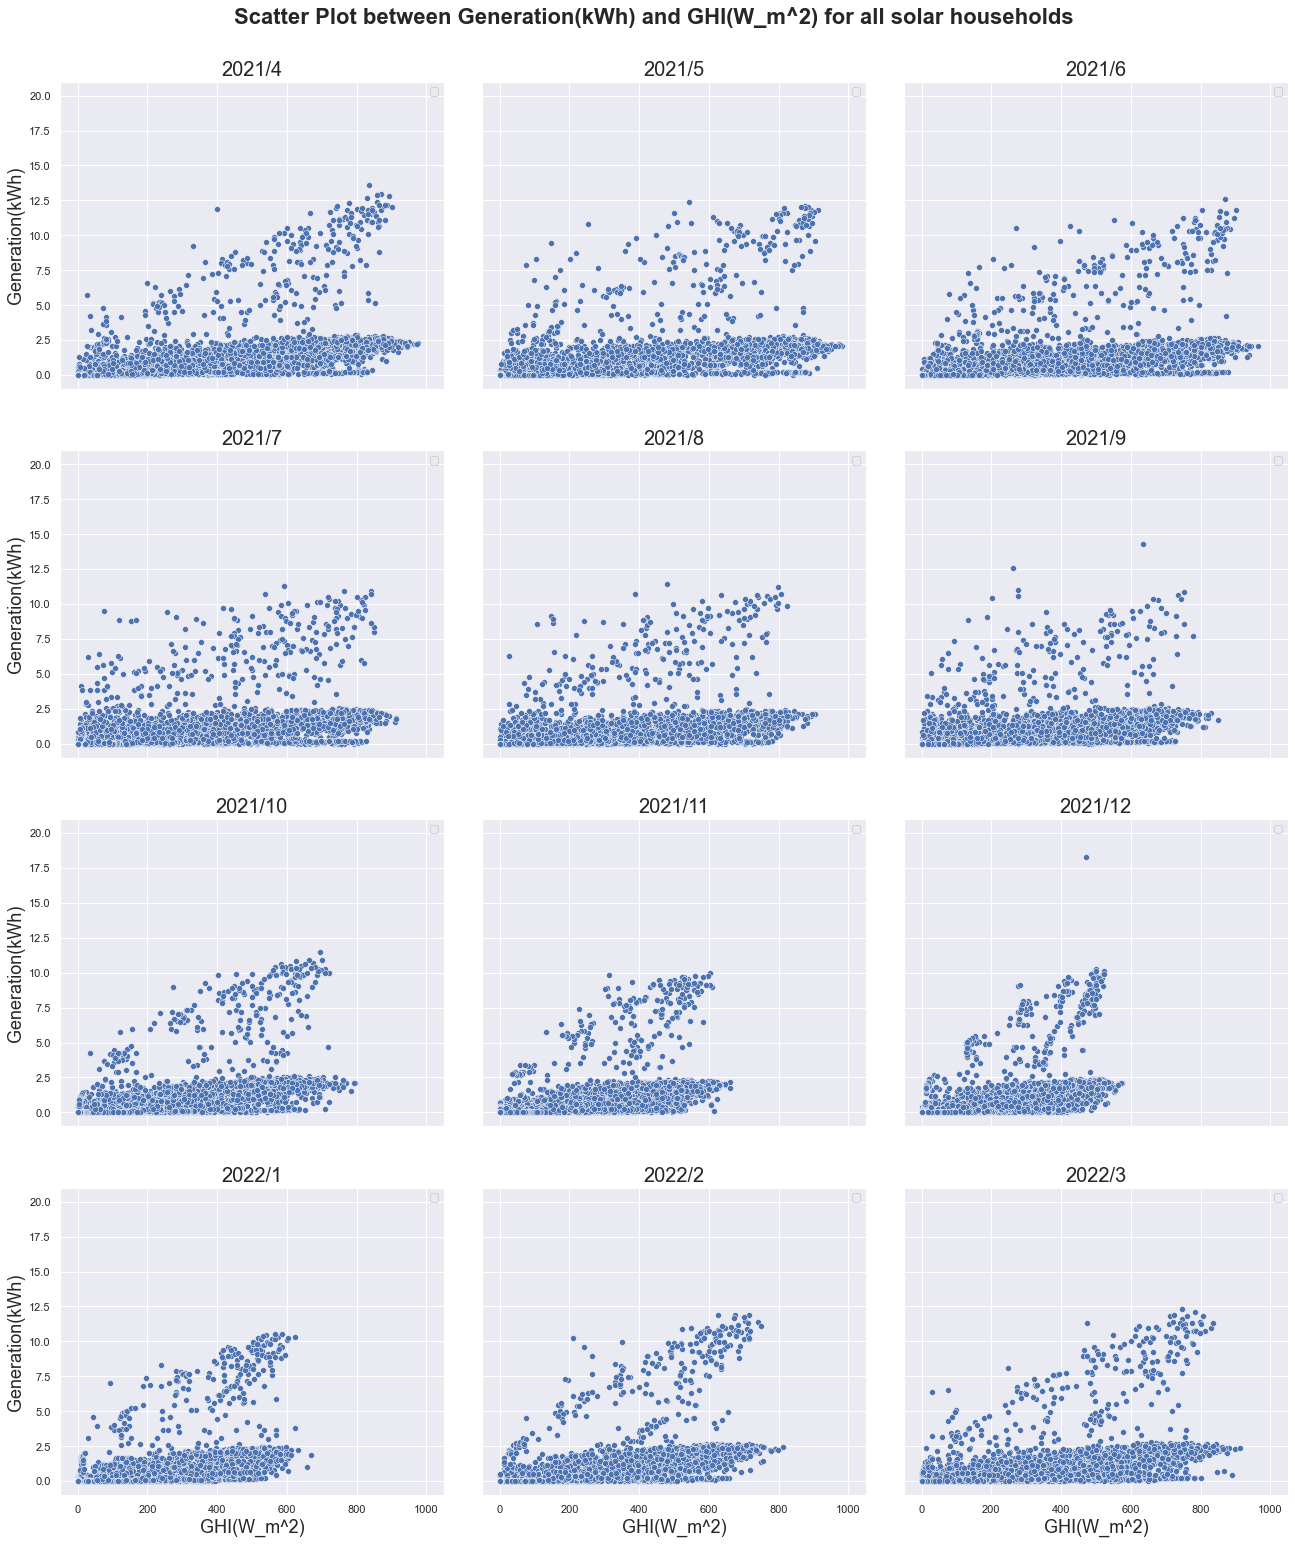

In [61]:
scatter_plot_use_all('ghi', '발전량(kWh)', 'GHI(W_m^2)', 'Generation(kWh)', -50.0, 1050.0, -1.0, 21.0)

<hr>

#### **온도 vs 전력 소비량**

Scatter Plot 시작
Scatter Plot 종료


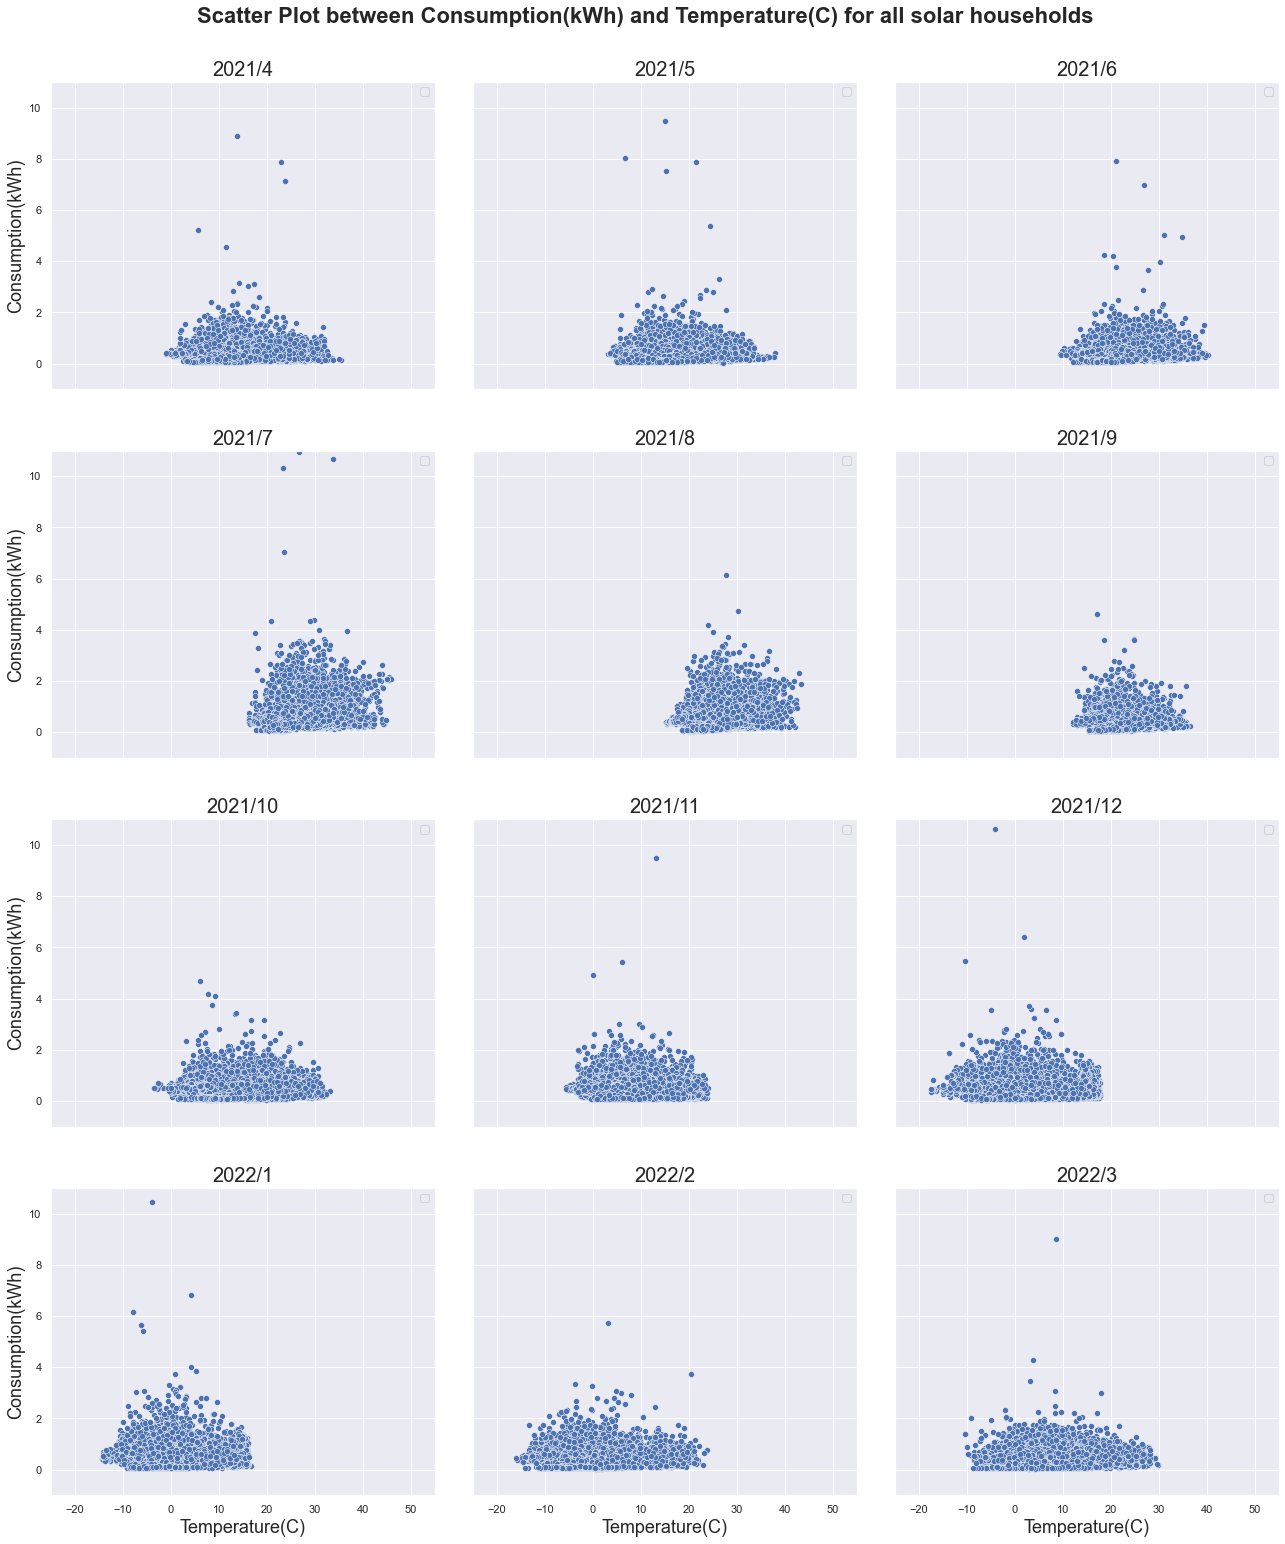

In [68]:
scatter_plot_use_all('temperature', '전력소비량(kWh)', 'Temperature(C)', 'Consumption(kWh)', -25.0, 55.0, -1.0, 11.0)

Scatter Plot 시작
Scatter Plot 종료


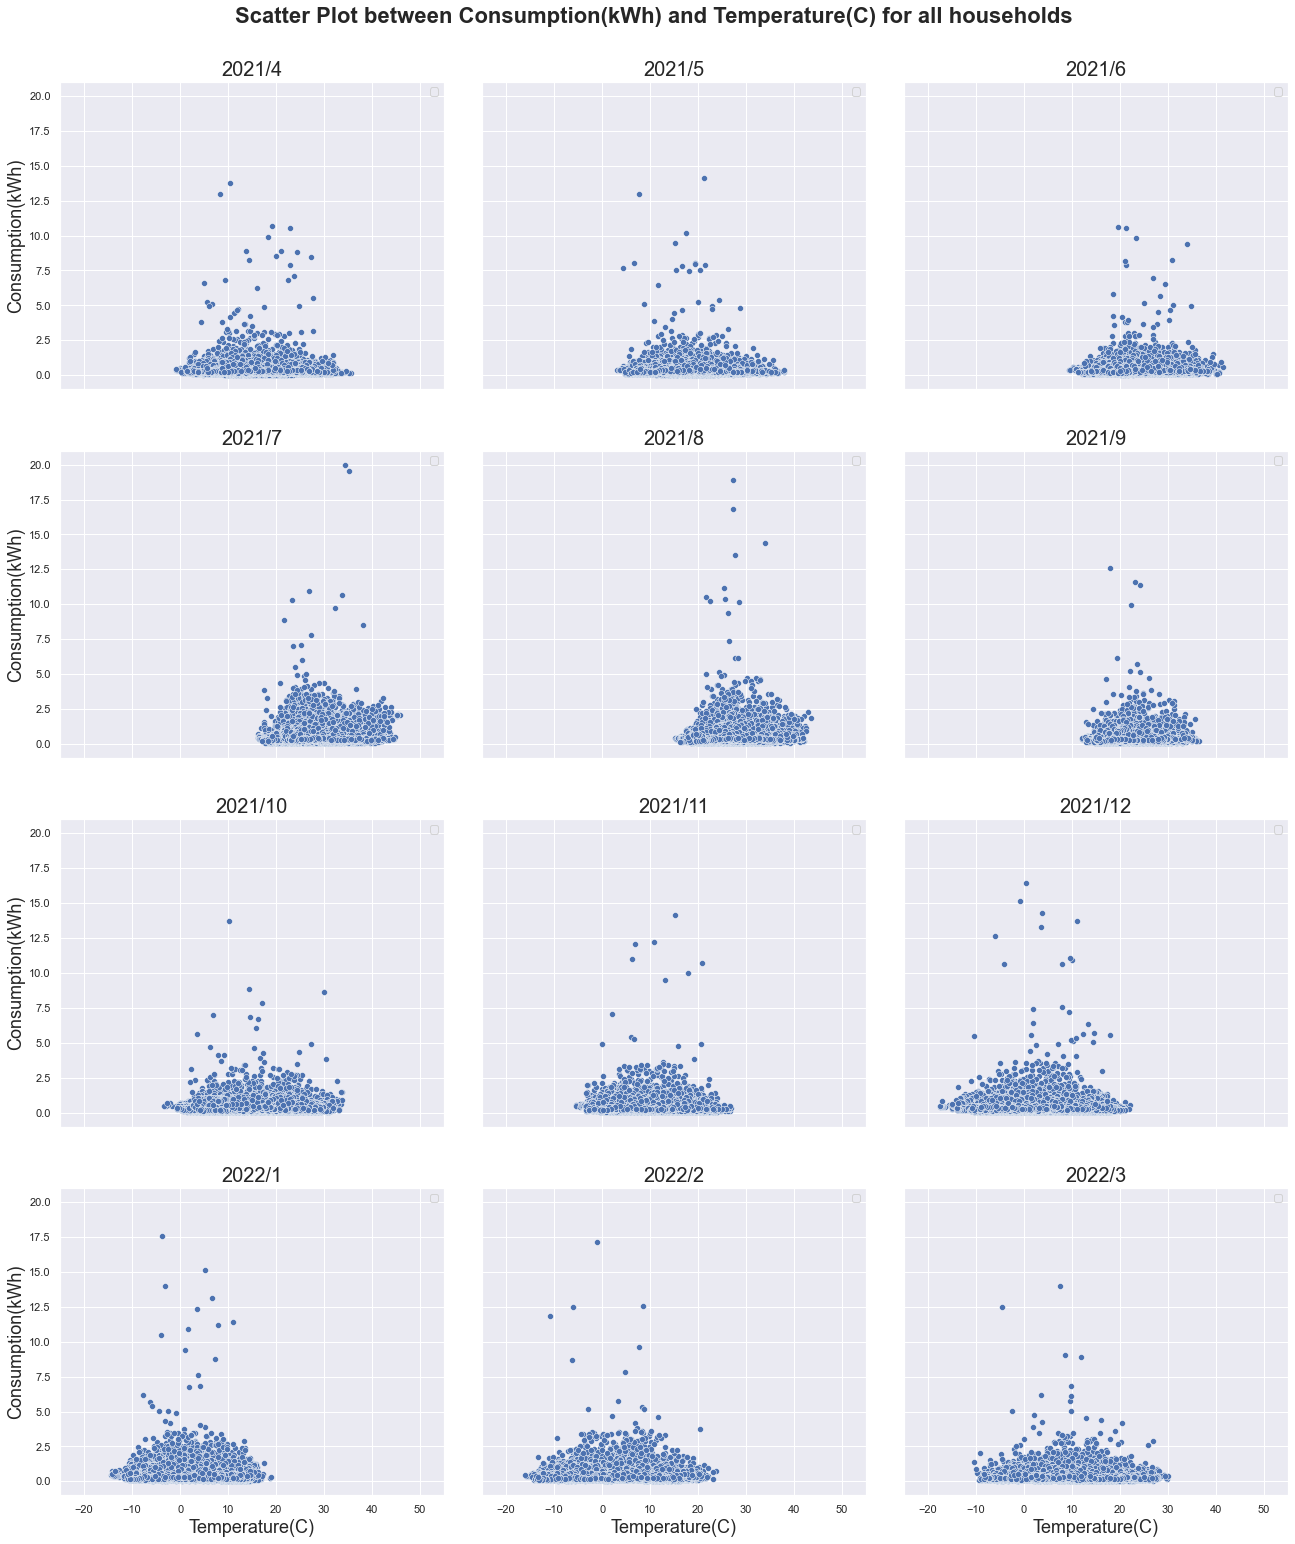

In [69]:
scatter_plot_all('temperature', '전력소비량(kWh)', 'Temperature(C)', 'Consumption(kWh)', -25.0, 55.0, -1.0, 21.0)